# Proyecto Final: **Web Scraper con Python**

*Proyecto hecho por:*
---
>-Hernández Sánchez María José   
>-Quiñones Ramírez Marlene Casandra  
>-Ramirez Coria Sandra Gisselle  
>-Torres Nuñez Diego

Algunos requerimientos:

-Se deja comentada la correcta instalación de dos librerías por si aún no están instaladas en su equipo.

-Se debe instalar un Webdriver en la computadora, específicamente Chromedriver y saber su dirección donde se tendrá almacenado.

In [ ]:
## Correr cada línea de código por separado y sólo correr si no están isntaladas
# pip install pandasql


In [ ]:
# pip install selenium

Se muestran las librerías que se utilizarán a lo largo del código.

In [1]:
#### --- Este código se debe ejecutar para obtener las consultas y las gráficas ---
### Cargamos las librerías que se utilizarán a lo largo del proyecto

import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plt
import time 
import numpy as np
import re
from selenium import webdriver

from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By


## 0. Función de apoyo para convertir str a numeric

Esta función ayudará a cambiar el tipo de dato de los precios: de str a numeric.

In [2]:
#### --- Este código se debe ejecutar para obtener las consultas y las gráficas ---
def precios_floats(datos, archivo):
    
    ### Convertimos los precios a numericos        
    datos['Precio_rebajado'] = pd.to_numeric(datos['Precio_rebajado'], errors = 'coerce')
    datos['Precio_original'] = pd.to_numeric(datos['Precio_original'], errors = 'coerce')

    datos.to_excel(archivo, index = False)
        
    ### Visualizamos los tipos de datos
    # print(datos.dtypes)
    
    return datos


## 1.-2. Funciones de sitios Web

Ahora, se mostrarán las funciones del Web Scraper para cada sitio.

Los sitios seleccionados son:
    
    1.1. H&M
    1.2. Calvin Klein    
    1.3. Julio

Igual, se añaden otros posibles sitios con sus respectivos Web Scrapers:

    1.4. Zara
    1.5. Forever 21


### 1.1. Función H&M

In [3]:
#### --- Este código se debe ejecutar para obtener las consultas y las gráficas ---
def Buscador_HM(path, producto, url, marca):
    
    ## Definimos las listas locales que se usarán en el código
    lista_urls = list()
    lista_nombres = list()
    lista_precios = list()
    lista_promos = list()
    
    ## Creamos el url al que se quiere acceder, sólo observando el link base de la página
    productoc = producto.replace(" ","+")    
    url = url+productoc

    ### Accedemos a la página web deseada
    s = Service(path)
    driver = webdriver.Chrome(service = s)
    driver.get(url)
    
    #### Accedemos a los elementos que contienen los datos que queremos
    productos = driver.find_elements(By.CLASS_NAME, "item-details")
    
    
    ### Obtenemos los URLS de productos    
    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element(By.TAG_NAME, "a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
    
    
    ### Obtenemos los nombres de productos
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_element(By.CLASS_NAME,"item-heading").text)        
        except:
            lista_nombres.append(np.nan)

    
    ### Obtenemos los precios normales y promocionales de productos 
    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_element(By.CLASS_NAME,"item-price").text.split(" ")[1].replace("$","").replace(",",""))
            lista_promos.append(productos[i].find_element(By.CLASS_NAME,"item-price").text.split(" ")[0].replace("$","").replace(",",""))
        except:
            lista_precios.append(productos[i].find_element(By.CLASS_NAME,"item-price").text.split(" ")[0].replace("$","").replace(",",""))
            lista_promos.append(np.nan)        
    
      
    ## Creamos el DataFrame con datos ordenados
    df_hm = pd.DataFrame({"Fecha": time.strftime("%d/%m/%y"), "Tienda": marca, "Producto": producto, "Nombre": lista_nombres, "Precio_original":lista_precios, "Precio_rebajado":lista_promos, "URL":lista_urls})
    
    ## Cargamos el DataFrame al archivo .xlsx
    datos_webscraper = pd.read_excel("df_completo.xlsx")
    datos_webscraper = pd.concat([datos_webscraper, df_hm], axis = 0)
    datos_webscraper.to_excel("df_completo.xlsx", index = False)

    ## Cerramos la página web
    driver.quit()

    ##Devolvemos los datos contenidos en la base de datos
    return df_hm


El siguiente código es para probar que la función funciona de manera correcta con los productos seleccionados, **correr si sólo se quiere probar esta función.**

2. Los productos que se eligieron son:

        2.1. Blusa 
        2.2. Jeans mezclilla 
        2.3. Chamarra 
        2.4. Zapato    
        2.5. Tacón

In [ ]:
#Apoyo consulta H&M

###  Creamos un archivo .xlsx para almacenar los datos y crear así una base de datos
### o simplemente se limpa el archivo ya existente
aux = pd.DataFrame()
aux.to_excel("df_completo.xlsx", index = False)

## Directorio donde está almacenado el Webdriver
path = "C:\webdriver3\chromedriver.exe"

## Datos básicos para las búsquedas
marcahm = "H&M"
urlhm = "https://www2.hm.com/es_mx/search-results.html?q="

## Llamamos a la función con su sitios y los diferentes productos
for productos in ["Blusa", "Jeans mezclilla", "Chamarra", "Zapato", "Tacón"]:
    Buscador_HM(path, productos, urlhm, marcahm)

## Se guarda la información de manera adecuada en el archivo .xlsx
df_hm = pd.read_excel("df_completo.xlsx")

## Hacemos uso de la función para convertir los precios de str a numeric
precios_floats(df_hm, "df_completo.xlsx")

## Se vuelven a almacenar estos nuevos datos en nuestra base de datos
df_hm = pd.read_excel("df_completo.xlsx")

# Mandamos a consola la base de datos
df_hm


### 1.2. Función Calvin Klein

In [4]:
#### --- Este código se debe ejecutar para obtener las consultas y las gráficas ---
def Buscador_CK(path, producto, url, marca):

    ## Definimos las listas locales que se usarán en el código
    lista_urls = list()
    lista_nombres = list()
    lista_precios = list()
    lista_promos = list()
    
    ## Creamos el url al que se quiere acceder, sólo observando el link base de la página
    productoc = producto.replace(" ","%20")
    url = url+productoc
    
    ### Accedemos a la página web deseada
    s = Service(path)
    driver = webdriver.Chrome(service = s)
    driver.get(url)    
    
    #### Accedemos a los elementos que contienen los datos que queremos
    productos = driver.find_elements(By.CLASS_NAME,"product-item")
    
    
    ### Obtenemos los URLS de productos
    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element(By.TAG_NAME,"a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
    
    
    ### Obtenemos los nombres de productos
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_element(By.CLASS_NAME,"product-item__name").text)
        except:
            lista_nombres.append(np.nan)
    
    
    ### Obtenemos los precios normales y promocionales de productos 
    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_element(By.CLASS_NAME,"product-item__price").text.split(" ")[0].replace("$","").replace(",",""))
        except:
            lista_precios.append(np.nan)    
        try:
            lista_promos.append(productos[i].find_element(By.CLASS_NAME,"product-item__price").text.split(" ")[1].replace("$","").replace(",",""))
        except:
            lista_promos.append(np.nan)    
    
    ## Creamos el DataFrame con datos ordenados
    df_ck = pd.DataFrame({"Fecha": time.strftime("%d/%m/%y"), "Tienda": marca, "Producto": producto, "Nombre": lista_nombres, "Precio_original":lista_precios, "Precio_rebajado":lista_promos, "URL":lista_urls})
    
    ## Cargamos el DataFrame al archivo .xlsx
    datos_webscraper = pd.read_excel("df_completo.xlsx")
    datos_webscraper = pd.concat([datos_webscraper, df_ck], axis = 0)
    datos_webscraper.to_excel("df_completo.xlsx", index = False)

    ## Cerramos la página web
    driver.quit()
    
    ##Devolvemos los datos contenidos en la base de datos
    return df_ck


El siguiente código es para probar que la función funciona de manera correcta con los productos seleccionados, **correr si sólo se quiere probar esta función.**

2. Los productos que se eligieron son:

        2.1. Blusa 
        2.2. Jeans mezclilla 
        2.3. Chamarra 
        2.4. Zapato    
        2.5. Tacón

In [ ]:
#Apoyo consulta Calvin Klein

###  Creamos un archivo .xlsx para almacenar los datos y crear así una base de datos
### o simplemente se limpa el archivo ya existente
aux = pd.DataFrame()
aux.to_excel("df_completo.xlsx", index = False)

## Directorio donde está almacenado el Webdriver
path = "C:\webdriver3\chromedriver.exe"

## Datos básicos para las búsquedas
marcack = "Calvin Klein"
urlck = "https://www.calvinklein.mx/"

## Llamamos a la función con su sitios y los diferentes productos
for productos in ["Blusa", "Jeans mezclilla", "Chamarra", "Zapato", "Tacón"]:
    Buscador_CK(path, productos, urlck, marcack)

## Se guarda la información de manera adecuada en el archivo .xlsx
df_ck = pd.read_excel("df_completo.xlsx")

## Hacemos uso de la función para convertir los precios de str a numeric
precios_floats(df_ck, "df_completo.xlsx")

## Se vuelven a almacenar estos nuevos datos en nuestra base de datos
df_ck = pd.read_excel("df_completo.xlsx")

# Mandamos a consola la base de datos
df_ck


### 1.3. Función Julio

In [5]:
#### --- Este código se debe ejecutar para obtener las consultas y las gráficas ---
def Buscador_Julio(path, producto, url, marca):
    
    ## Definimos las listas locales que se usarán en el código
    lista_urls = list()
    lista_nombres = list()
    lista_precios = list()
    lista_promos = list()
    
    ## Creamos el url al que se quiere acceder, sólo observando el link base de la página
    productoc = producto.replace(" ","+")
    url = url+productoc

    ### Accedemos a la página web deseada
    s = Service(path)
    driver = webdriver.Chrome(service = s)
    driver.get(url)
    
    #### Accedemos a los elementos que contienen los datos que queremos
    productos = driver.find_elements(By.CLASS_NAME, "product-item-info")
    
    ### Obtenemos los URLS de productos    
    for i in range(len(productos)-1):
        try:
            lista_urls.append(productos[i].find_element(By.TAG_NAME, "a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)


    ### Obtenemos los nombres de productos
    for i in range(len(productos)-1):
        try:
            lista_nombres.append(productos[i].text.split("\n")[0])
        except:
            lista_nombres.append(np.nan)
    
    
    ### Obtenemos los precios normales y promocionales de productos 
    for i in range(len(productos)-1):
        try:                
            lista_precios.append(productos[i].text.split("\n")[2].split(" ")[0].replace("$", "").replace(",", ""))
            lista_promos.append(productos[i].text.split("\n")[2].split(" ")[1].replace("$", "").replace(",", ""))
        except:
            lista_precios.append(productos[i].text.split("\n")[1].replace("$", "").replace(",", ""))
            lista_promos.append(np.nan)

    
    ## Creamos el DataFrame con datos ordenados
    df_julio = pd.DataFrame({"Fecha": time.strftime("%d/%m/%y"), "Tienda": marca, "Producto": producto, "Nombre": lista_nombres, "Precio_original":lista_precios, "Precio_rebajado":lista_promos, "URL":lista_urls})
    
    ## Cargamos el DataFrame al archivo .xlsx
    datos_webscraper = pd.read_excel("df_completo.xlsx")
    datos_webscraper = pd.concat([datos_webscraper, df_julio], axis = 0)
    datos_webscraper.to_excel("df_completo.xlsx", index = False)

    ## Cerramos la página web
    driver.quit()

    ##Devolvemos los datos contenidos en la base de datos
    return df_julio


El siguiente código es para probar que la función funciona de manera correcta con los productos seleccionados, **correr si sólo se quiere probar esta función.**

2. Los productos que se eligieron son:

        2.1. Blusa 
        2.2. Jeans mezclilla 
        2.3. Chamarra 
        2.4. Zapato    
        2.5. Tacón

In [ ]:
#Apoyo consulta Julio

###  Creamos un archivo .xlsx para almacenar los datos y crear así una base de datos
### o simplemente se limpa el archivo ya existente
aux = pd.DataFrame()
aux.to_excel("df_completo.xlsx", index = False)

## Directorio donde está almacenado el Webdriver
path = "C:\webdriver3\chromedriver.exe"

## Datos básicos para las búsquedas
marcaj = "Julio"
urlj = "https://julio.com/catalogsearch/result/?q="

## Llamamos a la función con su sitios y los diferentes productos
for productos in ["Blusa", "Jeans mezclilla", "Chamarra", "Zapato", "Tacón"]:
    Buscador_Julio(path, productos, urlj, marcaj)

## Se guarda la información de manera adecuada en el archivo .xlsx
df_julio = pd.read_excel("df_completo.xlsx")

## Hacemos uso de la función para convertir los precios de str a numeric
precios_floats(df_julio, "df_completo.xlsx")

## Se vuelven a almacenar estos nuevos datos en nuestra base de datos
df_julio = pd.read_excel("df_completo.xlsx")

# Mandamos a consola la base de datos
df_julio


### 1.4. Función Zara

In [ ]:
#### --- Este código se debe ejecutar para obtener las consultas y las gráficas ---
def Buscador_Zara(path, producto, marca):
    
    ## Definimos las listas locales que se usarán en el código
    lista_urls = list()
    lista_nombres = list()
    lista_precios = list()
    lista_promos = list()
    
    ## Creamos el url al que se quiere acceder, sólo observando el link base de la página
    productoc = producto.replace(" ","%20")
    url = "https://www.zara.com/mx/es/search?searchTerm="+productoc+"&section=WOMAN"    
    
    ### Accedemos a la página web deseada
    s = Service(path)
    driver = webdriver.Chrome(service = s)
    driver.get(url)
    
    #### Accedemos a los elementos que contienen los datos que queremos    
    productos = driver.find_elements(By.CLASS_NAME, "product-grid-product-info__product-header")
    
    
    ### Obtenemos los URLS de productos
    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element(By.TAG_NAME, "a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
    
    
    ### Obtenemos los nombres de productos
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].text.split("\n")[0])
        except:
            lista_nombres.append(np.nan)
    
    
    ### Obtenemos los precios normales y promocionales de productos 
    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].text.split("\n")[1].split(" ")[0].replace(".","").replace(",","."))
            lista_promos.append(productos[i].text.split("\n")[2].split(" ")[0].replace(".","").replace(",","."))
        except:
            lista_promos.append(np.nan)    
    
    
    ## Creamos el DataFrame con datos ordenados
    df_zara = pd.DataFrame({"Fecha": time.strftime("%d/%m/%y"), "Tienda": marca, "Producto": producto, "Nombre": lista_nombres, "Precio_original":lista_precios, "Precio_rebajado":lista_promos, "URL":lista_urls})
    
    ## Cargamos el DataFrame al archivo .xlsx
    datos_webscraper = pd.read_excel("df_completo.xlsx")
    datos_webscraper = pd.concat([datos_webscraper, df_zara], axis = 0)
    datos_webscraper.to_excel("df_completo.xlsx", index = False)

    ## Cerramos la página web
    driver.quit()

    ##Devolvemos los datos contenidos en la base de datos
    return df_zara


El siguiente código es para probar que la función funciona de manera correcta con los productos seleccionados, **correr si sólo se quiere probar esta función.**

2. Los productos que se eligieron son:

        2.1. Blusa 
        2.2. Jeans mezclilla 
        2.3. Chamarra 
        2.4. Zapato    
        2.5. Tacón

In [ ]:
#Apoyo consulta Zara
###  Creamos un archivo .xlsx para almacenar los datos y crear así una base de datos
### o simplemente se limpa el archivo ya existente
aux = pd.DataFrame()
aux.to_excel("df_completo.xlsx", index = False)

## Directorio donde está almacenado el Webdriver
path = "C:\webdriver3\chromedriver.exe"

## Datos básicos para las búsquedas
marcaz = "Zara"

## Llamamos a la función con su sitios y los diferentes productos
for productos in ["Blusa", "Jeans mezclilla", "Chamarra", "Zapato", "Tacón"]:
    Buscador_Zara(path, productos, marcaz)

## Se guarda la información de manera adecuada en el archivo .xlsx
df_zara = pd.read_excel("df_completo.xlsx")

## Hacemos uso de la función para convertir los precios de str a numeric
precios_floats(df_zara, "df_completo.xlsx")

## Se vuelven a almacenar estos nuevos datos en nuestra base de datos
df_zara = pd.read_excel("df_completo.xlsx")

# Mandamos a consola la base de datos
df_zara

#print(df_zara.dtypes)


### 1.5. Función Forever 21

In [ ]:
#### --- Este código se debe ejecutar para obtener las consultas y las gráficas ---
def Buscador_F21(path, producto, url, marca):
    
    ## Definimos las listas locales que se usarán en el código
    lista_urls = list()
    lista_nombres = list()
    lista_precios = list()
    lista_promos = list()
    
    ## Creamos el url al que se quiere acceder, sólo observando el link base de la página
    productoc = producto.replace(" ","+")    
    url = url+productoc

    ### Accedemos a la página web deseada
    s = Service(path)
    driver = webdriver.Chrome(service = s)
    driver.get(url)
    
    #### Accedemos a los elementos que contienen los datos que queremos
    productos = driver.find_elements(By.CLASS_NAME, "c-card-product")
    
    
    ### Obtenemos los URLS de productos    
    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element(By.TAG_NAME, "a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)


    ### Obtenemos los nombres de productos
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].text.split("\n")[2].split(" |")[0])
        except:
            lista_nombres.append(productos[i].text.split("\n")[1].split(" |")[0])
    
        
    ### Obtenemos los precios normales y promocionales de productos 
    for i in range(len(productos)):
        lista_precios.append(productos[i].text.split("\n")[0].replace("$ ", "").replace(",", ""))
        if(len(productos[i].text.split("\n")) == 3):        
            lista_promos.append(productos[i].text.split("\n")[1].replace("$ ", "").replace(",", ""))
        else:        
            lista_promos.append(np.nan)

    
    ## Creamos el DataFrame con datos ordenados
    df_f21 = pd.DataFrame({"Fecha": time.strftime("%d/%m/%y"), "Tienda": marca, "Producto": producto, "Nombre": lista_nombres, "Precio_original":lista_precios, "Precio_rebajado":lista_promos, "URL":lista_urls})
    
    ## Cargamos el DataFrame al archivo .xlsx
    datos_webscraper = pd.read_excel("df_completo.xlsx")
    datos_webscraper = pd.concat([datos_webscraper, df_f21], axis = 0)
    datos_webscraper.to_excel("df_completo.xlsx", index = False)

    ## Cerramos la página web
    driver.quit()

    ##Devolvemos los datos contenidos en la base de datos
    return df_f21


El siguiente código es para probar que la función funciona de manera correcta con los productos seleccionados, **correr si sólo se quiere probar esta función.**

2. Los productos que se eligieron son:

        2.1. Blusa 
        2.2. Jeans mezclilla 
        2.3. Chamarra 
        2.4. Zapato    
        2.5. Tacón

In [ ]:
#Apoyo consulta Forever 21

###  Creamos un archivo .xlsx para almacenar los datos y crear así una base de datos
### o simplemente se limpa el archivo ya existente
aux = pd.DataFrame()
aux.to_excel("df_completo.xlsx", index = False)

## Directorio donde está almacenado el Webdriver
path = "C:\webdriver3\chromedriver.exe"

## Datos básicos para las búsquedas
marcaf21 = "Forever 21"
urlf21 = "https://forever21.com.mx/search?q="

## Llamamos a la función con su sitios y los diferentes productos
for productos in ["Blusa", "Jeans mezclilla", "Chamarra", "Zapato", "Tacón"]:
    Buscador_F21(path, productos, urlf21, marcaf21)

## Se guarda la información de manera adecuada en el archivo .xlsx
df_f21 = pd.read_excel("df_completo.xlsx")

## Hacemos uso de la función para convertir los precios de str a numeric
precios_floats(df_f21, "df_completo.xlsx")

## Se vuelven a almacenar estos nuevos datos en nuestra base de datos
df_f21 = pd.read_excel("df_completo.xlsx")

# Mandamos a consola la base de datos
df_f21


## 3. Extracción de datos

La siguiente función tiene como objetivo crear una base de datos en formato .xlsx para almacenar los datos de todos los sitios web a los que se quieren acceder. Es decir, es el main del Web Scraper, el cual ya hace uso de todas las funciones en conjunto para todos los productos seleccionados.

In [6]:
#### --- Este código se debe ejecutar para obtener las consultas y las gráficas ---
"""
   Se crea el sig código para realizar la extracción de datos de los sitios seleccionados
  y para almacenarlos en un archivo .xlsx
"""

### Creamos un archivo .xlsx para almacenar los datos y crear así una base de datos
###o simplemente se limpa el archivo ya existente
aux = pd.DataFrame()
aux.to_excel("df_completo.xlsx", index = False)


#Directorio donde está almacenado el Webdriver
path = "C:\webdriver3\chromedriver.exe"

##Datos básicos para las búsquedas
marcahm = "H&M"
urlhm = "https://www2.hm.com/es_mx/search-results.html?q="

marcack = "Calvin Klein"
urlck = "https://www.calvinklein.mx/"

marcaj = "Julio"
urlj = "https://julio.com/catalogsearch/result/?q="

marcaz = "Zara"

marcaf21 = "Forever 21"
urlf21 = "https://forever21.com.mx/search?q="


##Llamamos a cada función con sus respectivos sitios y productos
for productos in ["Blusa", "Jeans mezclilla", "Chamarra", "Zapato", "Tacón"]:
    Buscador_HM(path, productos, urlhm, marcahm)
    Buscador_CK(path, productos, urlck, marcack)
    Buscador_Julio(path, productos, urlj, marcaj)
    #Buscador_Zara(path, productos, marcaz)    
    #Buscador_F21(path, productos, urlf21, marcaf21)    

##Se guarda la información de manera adecuada en el archivo .xlsx
df = pd.read_excel("df_completo.xlsx")

##Hacemos uso de la función para convertir los precios de str a numeric
precios_floats(df, "df_completo.xlsx")

##Se vuelven a almacenar estos nuevos datos en nuestra base de datos
df = pd.read_excel("df_completo.xlsx")

#Mandamos a pantalla la base de datos
df


,Fecha,Tienda,Producto,Nombre,Precio_original,Precio_rebajado,URL
0,27/01/22,H&M,Blusa,Blusa con escote en V,329.0,NaN,https://www2.hm.com/es_mx/productpage.09397030...
1,27/01/22,H&M,Blusa,Blusa con escote en V,329.0,NaN,https://www2.hm.com/es_mx/productpage.09397030...
2,27/01/22,H&M,Blusa,Blusa con escote en V,329.0,NaN,https://www2.hm.com/es_mx/productpage.09397030...
3,27/01/22,H&M,Blusa,Blusa con escote en V,329.0,NaN,https://www2.hm.com/es_mx/productpage.09397030...
4,27/01/22,H&M,Blusa,Blusa con escote en V,329.0,NaN,https://www2.hm.com/es_mx/productpage.09397030...
...,...,...,...,...,...,...,...
450,27/01/22,Julio,Tacón,Mule Nudo Animal Print Piel,1599.0,799.5,https://julio.com/mule-nudo-animal-print-piel
451,27/01/22,Julio,Tacón,Zapato Slipper Piel,1599.0,799.5,https://julio.com/zapato-slipper-piel
452,27/01/22,Julio,Tacón,Botín Peep Toe Destalonado,1899.0,949.5,https://julio.com/botin-peep-toe-destalonado-z...
453,27/01/22,Julio,Tacón,Botín Destalonado Cocodrilo,1899.0,1139.4,https://julio.com/mule-con-tacon-destalonado


## 4. Consultas

4.1. Cantidad de productos por tienda.

In [7]:
#### --- Este código se debe ejecutar para obtener las consultas y las gráficas ---
ps.sqldf("select count(*) as Cantidad, Producto, Tienda \
          from df \
          group by Producto, Tienda")

,Cantidad,Producto,Tienda
0,3,Blusa,Calvin Klein
1,36,Blusa,H&M
2,149,Blusa,Julio
3,12,Chamarra,Calvin Klein
4,36,Chamarra,H&M
5,17,Chamarra,Julio
6,5,Jeans mezclilla,Calvin Klein
7,36,Jeans mezclilla,H&M
8,32,Jeans mezclilla,Julio
9,3,Tacón,Calvin Klein


4.2. Promedio de precio original por producto y por tienda.

In [8]:
#### --- Este código se debe ejecutar para obtener las consultas y las gráficas ---
ps.sqldf("select Producto, Tienda, round(avg(Precio_original), 2) as 'Promedio precio original producto' \
          from df \
          group by Producto, Tienda")

,Producto,Tienda,Promedio precio original producto
0,Blusa,Calvin Klein,1665.67
1,Blusa,H&M,385.39
2,Blusa,Julio,1144.38
3,Chamarra,Calvin Klein,4440.67
4,Chamarra,H&M,619.28
5,Chamarra,Julio,2116.65
6,Jeans mezclilla,Calvin Klein,1611.40
7,Jeans mezclilla,H&M,510.39
8,Jeans mezclilla,Julio,1083.38
9,Tacón,Calvin Klein,3632.33


4.3. Promedio de precio de rebaja por producto y por tienda.

In [9]:
#### --- Este código se debe ejecutar para obtener las consultas y las gráficas ---
ps.sqldf("select Producto, Tienda, round(avg(Precio_rebajado), 2) as 'Promedio precio rebajado producto' \
          from df \
          group by Producto, Tienda")

,Producto,Tienda,Promedio precio rebajado producto
0,Blusa,Calvin Klein,566.33
1,Blusa,H&M,204.00
2,Blusa,Julio,625.95
3,Chamarra,Calvin Klein,2367.75
4,Chamarra,H&M,307.33
5,Chamarra,Julio,1247.42
6,Jeans mezclilla,Calvin Klein,614.12
7,Jeans mezclilla,H&M,449.00
8,Jeans mezclilla,Julio,664.09
9,Tacón,Calvin Klein,NaN


4.4. Precio promedio de prendas por tienda (considerando prendas sin descuento).

In [10]:
#### --- Este código se debe ejecutar para obtener las consultas y las gráficas ---
ps.sqldf("select Tienda, round(avg(Precio_original), 2) as 'Promedio precio original tienda' \
          from df \
          group by Tienda")

,Tienda,Promedio precio original tienda
0,Calvin Klein,3336.15
1,H&M,634.83
2,Julio,1305.70


4.5. Precio de descuento promedio de prendas por tienda (considerando prendas en descuento).

In [11]:
#### --- Este código se debe ejecutar para obtener las consultas y las gráficas ---
ps.sqldf("select Tienda, round(avg(Precio_rebajado), 2) as 'Promedio precio descuento tienda' \
          from df \
          group by Tienda")

,Tienda,Promedio precio descuento tienda
0,Calvin Klein,1569.82
1,H&M,339.91
2,Julio,719.40


4.6. Precio más alto por tienda y producto (considerando sólo precio original).

In [12]:
#### --- Este código se debe ejecutar para obtener las consultas y las gráficas ---
ps.sqldf("select MAX(Precio_original) as 'Máximo precio original', Tienda, Producto \
          from df \
          group by Producto, Tienda")

,Máximo precio original,Tienda,Producto
0,1899.0,Calvin Klein,Blusa
1,549.0,H&M,Blusa
2,1499.0,Julio,Blusa
3,7999.0,Calvin Klein,Chamarra
4,999.0,H&M,Chamarra
5,2599.0,Julio,Chamarra
6,2240.0,Calvin Klein,Jeans mezclilla
7,799.0,H&M,Jeans mezclilla
8,1399.0,Julio,Jeans mezclilla
9,4999.0,Calvin Klein,Tacón


4.7. Precio más bajo por tienda y producto (considerando sólo precio original).

In [13]:
#### --- Este código se debe ejecutar para obtener las consultas y las gráficas ---
ps.sqldf("select MIN(Precio_original) as 'Mínimo precio original', Tienda, Producto \
          from df \
          group by Producto, Tienda")

,Mínimo precio original,Tienda,Producto
0,1499.0,Calvin Klein,Blusa
1,249.0,H&M,Blusa
2,499.5,Julio,Blusa
3,1999.0,Calvin Klein,Chamarra
4,249.0,H&M,Chamarra
5,1499.0,Julio,Chamarra
6,1299.0,Calvin Klein,Jeans mezclilla
7,329.0,H&M,Jeans mezclilla
8,799.0,Julio,Jeans mezclilla
9,2299.0,Calvin Klein,Tacón


4.8. Precio más alto por producto en cada tienda (considerando sólo precio de descuento).

In [14]:
#### --- Este código se debe ejecutar para obtener las consultas y las gráficas ---
ps.sqldf("select MAX(Precio_rebajado) as 'Máximo precio descuento', Tienda, Producto \
          from df \
          group by Producto, Tienda")

,Máximo precio descuento,Tienda,Producto
0,645.66,Calvin Klein,Blusa
1,229.00,H&M,Blusa
2,839.40,Julio,Blusa
3,3271.90,Calvin Klein,Chamarra
4,449.00,H&M,Chamarra
5,1559.40,Julio,Chamarra
6,772.90,Calvin Klein,Jeans mezclilla
7,449.00,H&M,Jeans mezclilla
8,779.40,Julio,Jeans mezclilla
9,NaN,Calvin Klein,Tacón


4.9. Precio más bajo por producto en cada tienda (considerando sólo precio de descuento).

In [15]:
#### --- Este código se debe ejecutar para obtener las consultas y las gráficas ---
ps.sqldf("select MIN(Precio_rebajado) as 'Mínimo precio descuento', Tienda, Producto \
          from df \
          group by Producto, Tienda")

,Mínimo precio descuento,Tienda,Producto
0,509.66,Calvin Klein,Blusa
1,179.00,H&M,Blusa
2,349.50,Julio,Blusa
3,679.66,Calvin Klein,Chamarra
4,199.00,H&M,Chamarra
5,899.40,Julio,Chamarra
6,441.66,Calvin Klein,Jeans mezclilla
7,449.00,H&M,Jeans mezclilla
8,539.40,Julio,Jeans mezclilla
9,NaN,Calvin Klein,Tacón


## 5. Gráficos

Las siguientes líneas de código son para poder realizar de forma correcta las gráficas.

In [16]:
#### --- Este código se debe ejecutar para obtener las consultas y las gráficas ---
## Se hacen las consultas y se guardan en variables que a continuación se utilizarán
df_hm = ps.sqldf("select Tienda, Producto, Precio_original, Precio_rebajado \
          from df \
          where Tienda = 'H&M'")

df_ck = ps.sqldf("select Tienda, Producto, Precio_original, Precio_rebajado \
          from df \
          where Tienda = 'Calvin Klein'")

df_julio = ps.sqldf("select Tienda, Producto, Precio_original, Precio_rebajado \
          from df \
          where Tienda = 'Julio'")


## Las siguientes líneas son sólo si se usan los 5 Web Scrapers
# df_zara = ps.sqldf("select Tienda, Producto, Precio_original, Precio_rebajado \
#           from df \
#           where Tienda = 'Zara'")

# df_f21 = ps.sqldf("select Tienda, Producto, Precio_original, Precio_rebajado \
#           from df \
#           where Tienda = 'Forever 21'")


5.1. Comparación de precios y cantidad de productos que ofrece cada tienda, para estas gráficas se considera sólo el precio original.

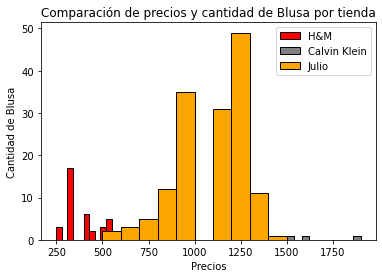

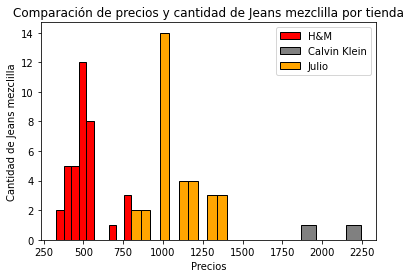

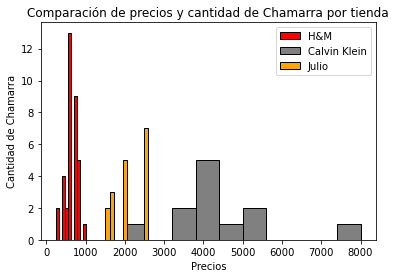

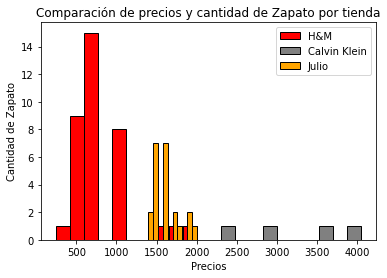

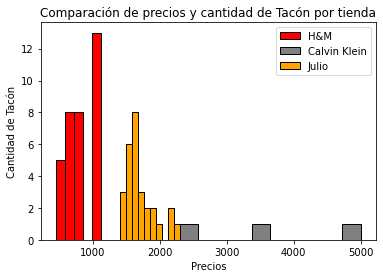

In [17]:
#### --- Este código se debe ejecutar para obtener las consultas y las gráficas ---
for i in ['Blusa', 'Jeans mezclilla', 'Chamarra', 'Zapato', 'Tacón']:
    fig, ax = plt.subplots()
    plt.hist(df_hm[df_hm['Producto']==i]['Precio_original'], color = 'red', ec = 'black', label = 'H&M')
    plt.hist(df_ck[df_ck['Producto']==i]['Precio_original'], color = 'grey', ec = 'black', label = 'Calvin Klein')
    plt.hist(df_julio[df_julio['Producto']==i]['Precio_original'], color ='orange', ec = 'black', label = 'Julio')
    
    ## En caso de que considere Zara y Forever 21
    #plt.hist(df_zara[df_zara['Producto']==i]['Precio_original'], color='green', ec='black', label='Zara')
    #En caso de que considere Forever 21
    #plt.hist(df_f21[df_f21['Producto']==i]['Precio_original'], color='purple', ec='yellow', label='Forever 21')
    
    plt.title('Comparación de precios y cantidad de ' + str(i)+ ' por tienda')
    plt.ylabel('Cantidad de ' + str(i))
    plt.xlabel('Precios')
    plt.legend(loc = 'upper right')

    plt.show()


5.2. Comparación de precios y cantidad de productos que ofrece cada tienda, para estas gráficas se considera sólo el precio promocional de los productos.

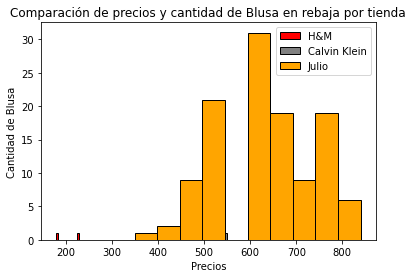

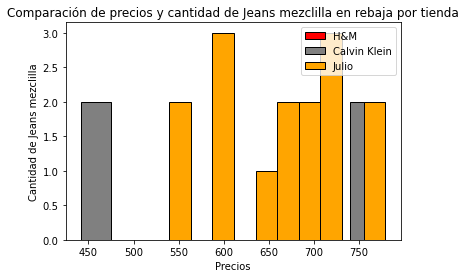

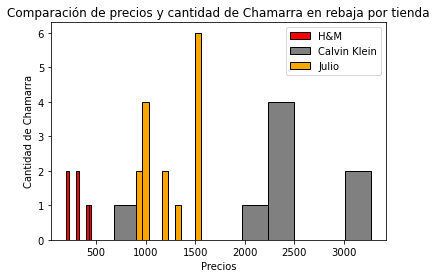

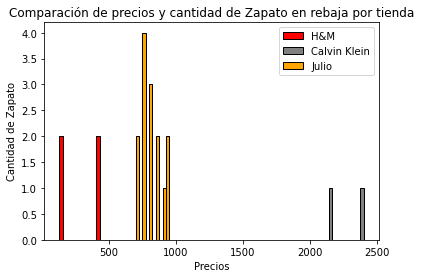

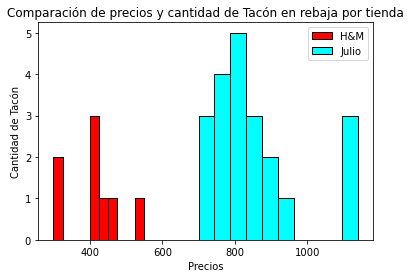

In [18]:
#### --- Este código se debe ejecutar para obtener las consultas y las gráficas ---
for i in ['Blusa', 'Jeans mezclilla', 'Chamarra', 'Zapato']:
    fig, ax = plt.subplots()
    plt.hist(df_hm[df_hm['Producto']==i]['Precio_rebajado'], color = 'red', ec='black', label = 'H&M')
    plt.hist(df_ck[df_ck['Producto']==i]['Precio_rebajado'], color = 'grey', ec='black', label = 'Calvin Klein')
    plt.hist(df_julio[df_julio['Producto']==i]['Precio_rebajado'], color = 'orange', ec='black', label = 'Julio')
    plt.title('Comparación de precios y cantidad de '+ str(i) +' en rebaja por tienda')
    plt.ylabel('Cantidad de ' + str(i) + '')
    plt.xlabel('Precios')
    plt.legend(loc='upper right')
    
    plt.show()
    
for i in ['Tacón']:
    fig, ax = plt.subplots()
    plt.hist(df_hm[df_hm['Producto']==i]['Precio_rebajado'], color = 'red', ec='black', label = 'H&M')    
    plt.hist(df_julio[df_julio['Producto']==i]['Precio_rebajado'], color = 'cyan', ec='black', label = 'Julio')
    plt.title('Comparación de precios y cantidad de '+ str(i) +' en rebaja por tienda')
    plt.ylabel('Cantidad de ' + str(i) + '')
    plt.xlabel('Precios')
    plt.legend(loc='upper right')
    
    plt.show()
    

5.3. Cantidad de prendas por producto considerando las 3 tiendas y su precio original.

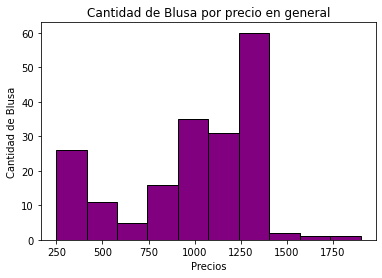

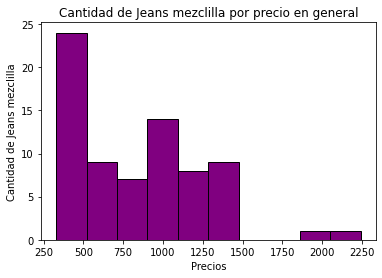

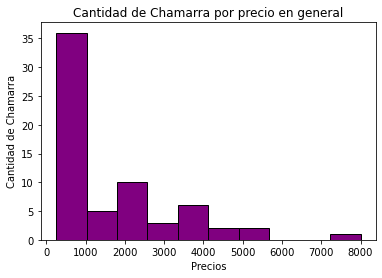

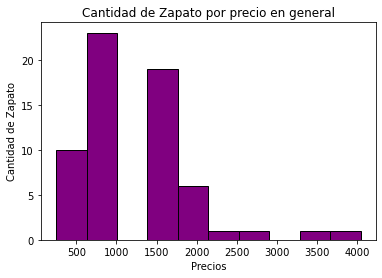

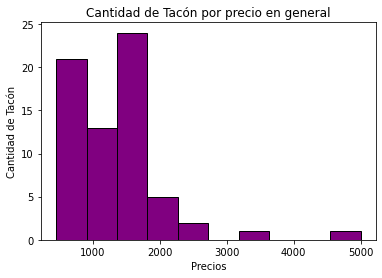

In [19]:
#### --- Este código se debe ejecutar para obtener las consultas y las gráficas ---
for i in ['Blusa', 'Jeans mezclilla', 'Chamarra', 'Zapato', 'Tacón']:
    fig, ax = plt.subplots()
    plt.hist(df[df['Producto']==i]['Precio_original'], color='purple', ec='black')
    plt.title('Cantidad de ' + str(i) + ' por precio en general')
    plt.ylabel('Cantidad de ' + str(i) + '')
    plt.xlabel('Precios')

    plt.show()


5.4. Cantidad de prendas por producto considerando las 3 tiendas y su precio de descuento.

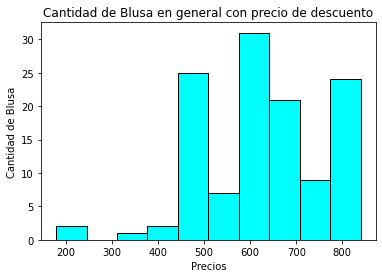

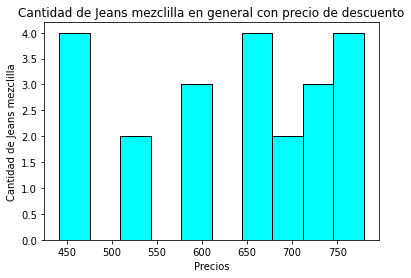

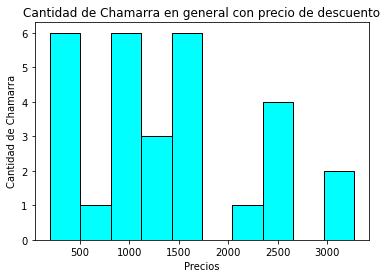

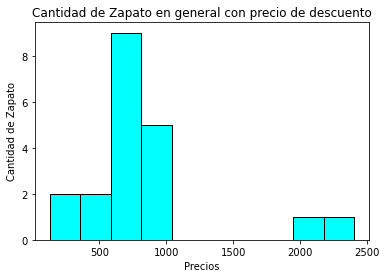

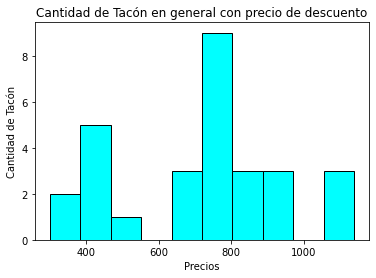

In [20]:
#### --- Este código se debe ejecutar para obtener las consultas y las gráficas ---
for i in ['Blusa', 'Jeans mezclilla', 'Chamarra', 'Zapato', 'Tacón']:
    fig, ax = plt.subplots()
    plt.hist(df[df['Producto']==i]['Precio_rebajado'], color='cyan', ec='black')
    plt.title('Cantidad de ' + str(i) + ' en general con precio de descuento')
    plt.ylabel('Cantidad de ' + str(i) + '')
    plt.xlabel('Precios')

    plt.show()
